In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

pd.set_option("display.max_columns",101)

import gc
import math

In [6]:
medical = pd.read_pickle(".../data/medical.p")

print(medical.UCURNINS.unique())
medical["UCURNINS"] = (medical.UCURNINS=="Yes").astype(int)
explVar = "UCURNINS"

print(medical.UCURNINS.unique())
levCols = ["UMARSTAT", "USATMED", "URELATE",
                      "REGION", "FHOSP", "UIMMSTAT",
                      "U_FTPT", "UBRACE", "UEDUC3",
                      "GENDER"]

numCols = ["FDENT", "FEMER", "FDOCT", "UAGE",
                     "U_WKSLY", "U_USHRS", "U_HRSLY",
                     "HOTHVAL", "HRETVAL", "HSSVAL", "HWSVAL"]

# Make variables binary.
dummLev = pd.get_dummies(medical[levCols], drop_first=True)
dummLev.shape
medical2 = pd.concat([medical[numCols], dummLev], axis=1)
print(medical.shape, math.sqrt(medical.shape[0]))


['Yes' 'No']
[1 0]
(35072, 29) 187.275198571514


In [3]:
medical.head(5)

UMARSTAT UCUREMP  UCURNINS  USATMED  URELATE   REGION STATE  \
0          Never married      No         1        4        2  Midwest    WI   
1              Separated     Yes         0        4        2  Midwest    WI   
2  Married_live together      No         0        4        5  Midwest    WI   
3               Divorced      No         1        1        4  Midwest    WI   
4          Never married     Yes         0        4        0  Midwest    WI   

       HHID FHOSP  FDENT  FEMER  FDOCT         UIMMSTAT U_USBORN  UAGE  \
0  55616128    No      0      0      0  US-born citizen      Yes    22   
1  54704000    No      2      0      0  US-born citizen      Yes    30   
2  57874272    No      0      1      0  US-born citizen      Yes    33   
3  54106816    No      0      0      1  US-born citizen      Yes    41   
4  54569152    No      2      0      0  US-born citizen      Yes    34   

      U_FTPT  U_WKSLY  U_HRSLY  U_USHRS  HEARNVAL  HOTHVAL  HRETVAL  HSSVAL  \
0  Full-time       52       40       40         0        0        0       0   
1  Full-time       52       40       40     31468     5950        0       0   
2  Part-time       52       30       30     24700    11340        0    4920   
3  Part-time       43       40       25     60000    39002        0       0   
4  Full-time       52       40       40     55280     4200        0       0   

   HWSVAL UBRACE  GENDER  UEDUC3  CEYES  CHAIR  
0       0  White  Female       0  hazel  brown  
1   31468  White  Female       1   blue  black  
2   24700  White    Male       0  brown  brown  
3   60000  Black  Female       0  brown  black  
4   55280  Black    Male       1  brown  black

Let's see the cross-tabulation for all nominal variables. We normalize them by the number of observations to see the values in percents.

In [7]:
for var in levCols:
    display(((pd.crosstab(medical[explVar], medical[var], margins=True) / medical.shape[0]) * 100).round(1))

UMARSTAT  Divorced  Married, do not live together  Married_live together  \
UCURNINS                                                                   
0              9.5                            0.5                   54.8   
1              2.0                            0.3                    5.7   
All           11.5                            0.8                   60.6   

UMARSTAT  Never married  Partnership  Separated  Unknown  Widowed    All  
UCURNINS                                                                  
0                  14.8          2.4        2.2      0.1      1.3   85.6  
1                   4.1          1.3        0.7      0.0      0.2   14.4  
All                18.9          3.7        2.9      0.1      1.5  100.0

USATMED     0    1    2     3     4    All
UCURNINS                                  
0         2.1  5.6  1.3  30.7  45.9   85.6
1         1.0  1.5  1.2   5.3   5.4   14.4
All       3.1  7.0  2.5  36.0  51.3  100.0

URELATE      0     1     2     3     4    5    All
UCURNINS                                          
0          9.7  18.3  18.9  23.1  10.2  5.3   85.6
1          2.6   2.8   3.0   2.8   1.7  1.5   14.4
All       12.2  21.1  22.0  25.9  12.0  6.9  100.0

REGION    Midwest  Northeast  South  West    All
UCURNINS                                        
0            28.9       18.2   19.9  18.5   85.6
1             3.1        2.1    5.2   4.0   14.4
All          32.1       20.4   25.1  22.5  100.0

FHOSP       No  Yes    All
UCURNINS                  
0         78.3  7.2   85.6
1         13.6  0.8   14.4
All       91.9  8.1  100.0

UIMMSTAT  Foreign-born, naturalized US citizen  Foreign-born, non-citizen  \
UCURNINS                                                                    
0                                          3.9                        4.1   
1                                          0.8                        3.2   
All                                        4.7                        7.2   

UIMMSTAT  US-born citizen    All  
UCURNINS                          
0                    77.6   85.6  
1                    10.5   14.4  
All                  88.1  100.0

U_FTPT    Full-time  Part-time    All
UCURNINS                             
0              70.9       14.6   85.6
1              10.9        3.5   14.4
All            81.8       18.2  100.0

UBRACE    Amer Indian/Native American/Aleutian or Eskimo  \
UCURNINS                                                   
0                                                    1.0   
1                                                    0.4   
All                                                  1.4   

UBRACE    Asian/Pacific Islander  Black  White    All  
UCURNINS                                               
0                            2.5    8.7   73.4   85.6  
1                            0.3    2.1   11.6   14.4  
All                          2.9   10.8   85.0  100.0

UEDUC3       0     1     2    All
UCURNINS                         
0          6.8  50.9  27.9   85.6
1          4.2   8.7   1.5   14.4
All       11.0  59.6  29.4  100.0

GENDER    Female  Male    All
UCURNINS                     
0           43.7  41.9   85.6
1            6.6   7.8   14.4
All         50.4  49.6  100.0

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
medical2 = medical.copy()

for col in levCols:
    medical2[col] = le.fit_transform(medical[col])


Let's calculate some stats to see which variables are most valuable.

In [17]:
from scipy import stats
from sklearn import feature_selection

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

minfos=[]

for var in levCols:
    print("\n", var)
    print("Pearson", np.round(stats.pearsonr(medical2[explVar], medical2[var]), 4))
    print("Mutual info", np.round(feature_selection.mutual_info_classif(medical2[var].values.reshape(-1,1),
                                                               medical[explVar].values), 4))
    minfos.append(feature_selection.mutual_info_classif(medical2[var].values.reshape(-1,1),
                                                        medical[explVar].values))
    print("Chi2", np.round(feature_selection.chi2(medical2[var].values.reshape(-1,1),
                                         medical[explVar].values), 4))
    print("Anova", np.round(feature_selection.f_classif(medical2[var].values.reshape(-1,1),
                                               medical[explVar].values), 4))

# We can sort recorded values.
imp = list(zip(minfos, levCols))
imp.sort(reverse=True)
imp


 UMARSTAT
Pearson [0.0749 0.    ]
Mutual info [0.0206]
Chi2 [[127.6882]
 [  0.    ]]
Anova [[197.8789]
 [  0.    ]]

 USATMED
Pearson [-0.1545  0.    ]
Mutual info [0.0183]
Chi2 [[266.2522]
 [  0.    ]]
Anova [[857.3748]
 [  0.    ]]

 URELATE
Pearson [-0.0143  0.0076]
Mutual info [0.0069]
Chi2 [[6.3176]
 [0.012 ]]
Anova [[7.1274]
 [0.0076]]

 REGION
Pearson [0.1127 0.    ]
Mutual info [0.0102]
Chi2 [[428.1961]
 [  0.    ]]
Anova [[451.0842]
 [  0.    ]]

 FHOSP
Pearson [-0.0334  0.    ]
Mutual info [0]
Chi2 [[36.0466]
 [ 0.    ]]
Anova [[39.257]
 [ 0.   ]]

 UIMMSTAT
Pearson [-0.1364  0.    ]
Mutual info [0.0262]
Chi2 [[82.5745]
 [ 0.    ]]
Anova [[664.7424]
 [  0.    ]]

 U_FTPT
Pearson [0.0679 0.    ]
Mutual info [0.001]
Chi2 [[132.1536]
 [  0.    ]]
Anova [[162.2316]
 [  0.    ]]

 UBRACE
Pearson [-0.052  0.   ]
Mutual info [0.0049]
Chi2 [[1.03374e+01]
 [1.30000e-03]]
Anova [[95.2415]
 [ 0.    ]]

 UEDUC3
Pearson [-0.2512  0.    ]
Mutual info [0.0334]
Chi2 [[691.6236]
 [  0.    ]]

[(array([0.03515756]), 'UEDUC3'),
 (array([0.02460561]), 'UIMMSTAT'),
 (array([0.02103224]), 'UMARSTAT'),
 (array([0.0175574]), 'USATMED'),
 (array([0.01044607]), 'REGION'),
 (array([0.00639372]), 'URELATE'),
 (array([0.00621077]), 'UBRACE'),
 (array([0.00155044]), 'FHOSP'),
 (array([0.00081913]), 'U_FTPT'),
 (array([0.00046002]), 'GENDER')]

We have less options for combination of discrete and continous variables. Let's see how the mutual information looks like.

In [20]:
from scipy import stats
from sklearn import feature_selection

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


for var in numCols:
    
    print(var, " Mutual info", np.round(feature_selection.mutual_info_regression(
        medical2[var].astype(float).values.reshape(-1,1),
        medical[explVar].astype(float).values), 4))
    minfos.append(feature_selection.mutual_info_regression(medical2[var].astype(float).values.reshape(-1,1),
                                                           medical[explVar].astype(float).values))

# We can sort recorded values.
imp = list(zip(minfos, numCols))
imp.sort(reverse=True)
imp

FDENT  Mutual info [0.0429]
FEMER  Mutual info [0]
FDOCT  Mutual info [0.0239]
UAGE  Mutual info [0.0192]
U_WKSLY  Mutual info [0.0096]
U_USHRS  Mutual info [0]
U_HRSLY  Mutual info [0.0084]
HOTHVAL  Mutual info [0.0013]
HRETVAL  Mutual info [0.0078]
HSSVAL  Mutual info [0.0007]
HWSVAL  Mutual info [0.0034]


[(array([0.03515756]), 'HRETVAL'),
 (array([0.03033289]), 'HWSVAL'),
 (array([0.02460561]), 'U_USHRS'),
 (array([0.02103224]), 'FDENT'),
 (array([0.0175574]), 'FEMER'),
 (array([0.01044607]), 'UAGE'),
 (array([0.00639372]), 'FDOCT'),
 (array([0.00621077]), 'HOTHVAL'),
 (array([0.00155044]), 'U_WKSLY'),
 (array([0.00081913]), 'U_HRSLY'),
 (array([0.00046002]), 'HSSVAL')]

We can use logistic regression for all variables (one variable at a time). Then we can calculate any metric or statistic for regression. We chose AUC as a good reference point.

In [21]:
from sklearn import metrics
import statsmodels.api as sm

aucs=[]

for var in levCols:
    mod = sm.GLM.from_formula(formula=explVar + " ~ " + var, data=medical, family=sm.families.Binomial())
    res = mod.fit()
    probs = res.predict()
    aucs.append(metrics.roc_auc_score(medical[explVar].values, probs))
    print(var, np.round(metrics.roc_auc_score(medical[explVar].values, probs), 4))

for var in numCols:
    mod = sm.GLM.from_formula(formula=explVar + " ~ " + var, data=medical, family=sm.families.Binomial())
    res = mod.fit()
    probs = res.predict()
    aucs.append(metrics.roc_auc_score(medical[explVar].values, probs))
    print(var, np.round(metrics.roc_auc_score(medical[explVar].values, probs), 4))

imp = list(zip(aucs, levCols+numCols))
imp.sort(reverse=True)
imp

UMARSTAT 0.6373
USATMED 0.6064
URELATE 0.5165
REGION 0.6014
FHOSP 0.513
UIMMSTAT 0.5934
U_FTPT 0.5372
UBRACE 0.5323
UEDUC3 0.6738
GENDER 0.5252
FDENT 0.6964
FEMER 0.5108
FDOCT 0.6869
UAGE 0.6181
U_WKSLY 0.5857
U_USHRS 0.5535
U_HRSLY 0.5497
HOTHVAL 0.4973
HRETVAL 0.5061
HSSVAL 0.5025
HWSVAL 0.4969


[(0.6964487152576064, 'FDENT'),
 (0.6868935102307081, 'FDOCT'),
 (0.6737774040138675, 'UEDUC3'),
 (0.6372515567948391, 'UMARSTAT'),
 (0.6181265687907294, 'UAGE'),
 (0.6063510287809526, 'USATMED'),
 (0.6013726061209655, 'REGION'),
 (0.5934462633726708, 'UIMMSTAT'),
 (0.5856560922320077, 'U_WKSLY'),
 (0.5534668036783484, 'U_USHRS'),
 (0.5497418742333913, 'U_HRSLY'),
 (0.5372143757851929, 'U_FTPT'),
 (0.5322917815436781, 'UBRACE'),
 (0.5252370568128775, 'GENDER'),
 (0.5165251197687822, 'URELATE'),
 (0.512961810848779, 'FHOSP'),
 (0.5107957813622168, 'FEMER'),
 (0.5061463625158901, 'HRETVAL'),
 (0.5024899514109548, 'HSSVAL'),
 (0.4973190452053029, 'HOTHVAL'),
 (0.49694189994742205, 'HWSVAL')]

Now let's take a look at Spearman correlation for both numerical and categorical variables.

<AxesSubplot:>

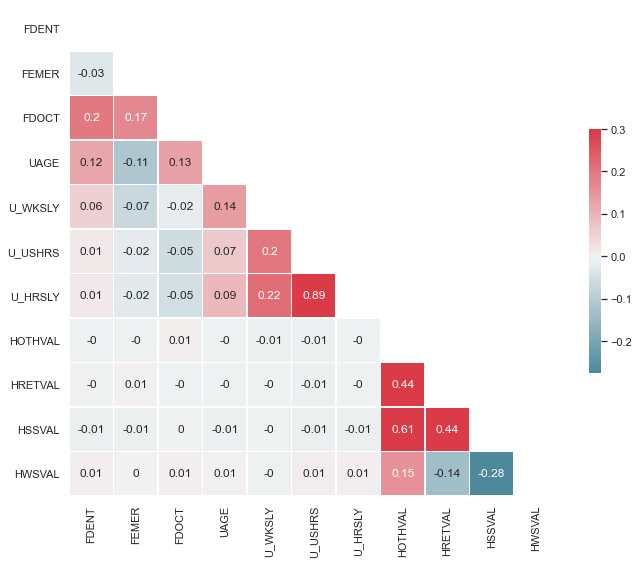

In [23]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = medical[numCols].corr('spearman')

# Generate a mask for the upper triangle.
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

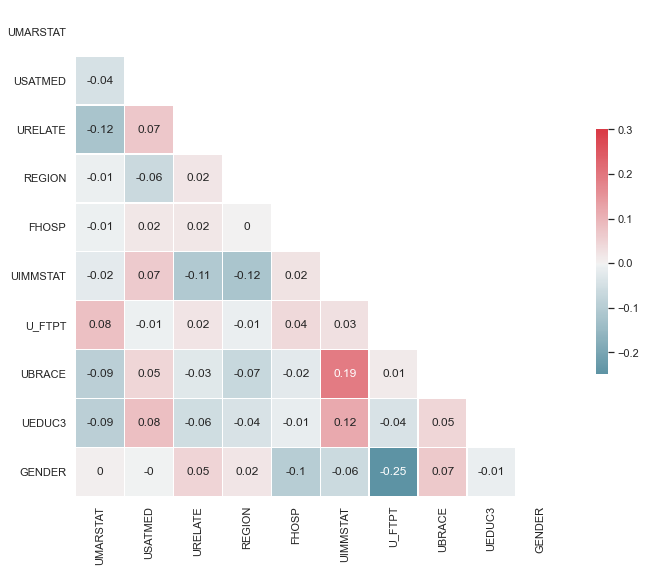

In [24]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = medical2[levCols].corr('spearman')

# Generate a mask for the upper triangle.
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
features = numCols + levCols
# Let's make variables binominal.
dummLev = pd.get_dummies(medical[levCols], drop_first=True)
dummLev.shape
medical2 = pd.concat([medical[numCols], dummLev], axis=1)
medical2[numCols] = medical2[numCols].apply(lambda x: (x - x.mean()) / x.std())
features = medical2.columns.tolist()

In [27]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors

def runKNN(expl_, features=features):
    
    n_neighbors = 30
    kf = KFold(n_splits=5)
    sampleSize = 5000
    probs = []
    aucs = []
    clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1, p=1)
    
    for train, test in kf.split(medical2.index.values):
        X = medical2.iloc[train][features].sample(sampleSize)
        clf.fit(X.values, medical.iloc[X.index.values][expl_].values)
        prob = clf.predict_proba(medical2.iloc[test][features].values)
        aucs.append(metrics.roc_auc_score(medical.iloc[test][expl_].values, prob[:,1]))
        
    print(np.round(np.mean(aucs), 2), np.round(aucs, 2))
    return np.mean(aucs)

In [31]:
newFeatures = []
tempFeatures = []

for k in range(10):
    aucs=[]
    featToTest = list(set(features) - set(newFeatures))
    
    for feat in featToTest:
        tempFeatures = newFeatures.copy()
        tempFeatures.append(feat)
        auc = runKNN(explVar, tempFeatures)
        aucs.append(auc)
        print(feat, tempFeatures, np.round(auc, 2))
        print('\n')
        
    imp = list(zip(aucs, featToTest))
    imp.sort(reverse=True)
    print("##############")
    print(imp[0:5], '\n')
    print("##############")
    print("Selecting:", imp[0][1], '\n')
    newFeatures.append(imp[0][1])
    print("Current selection:", newFeatures, '\n')
    print("##############")

0.54 [0.53 0.55 0.53 0.53 0.54]
U_FTPT_Part-time ['U_FTPT_Part-time'] 0.54


0.5 [0.51 0.51 0.51 0.49 0.51]
HOTHVAL ['HOTHVAL'] 0.5


0.52 [0.56 0.46 0.51 0.5  0.54]
URELATE ['URELATE'] 0.52


0.51 [0.5  0.51 0.51 0.49 0.5 ]
FEMER ['FEMER'] 0.51


0.5 [0.5 0.5 0.5 0.5 0.5]
UMARSTAT_Unknown ['UMARSTAT_Unknown'] 0.5


0.5 [0.51 0.5  0.5  0.5  0.5 ]
UBRACE_Asian/Pacific Islander ['UBRACE_Asian/Pacific Islander'] 0.5


0.6 [0.61 0.62 0.5  0.62 0.64]
UMARSTAT_Married_live together ['UMARSTAT_Married_live together'] 0.6


0.59 [0.58 0.59 0.58 0.6  0.58]
UIMMSTAT_Foreign-born, non-citizen ['UIMMSTAT_Foreign-born, non-citizen'] 0.59


0.53 [0.51 0.54 0.55 0.52 0.53]
U_HRSLY ['U_HRSLY'] 0.53


0.53 [0.53 0.52 0.52 0.54 0.53]
UBRACE_White ['UBRACE_White'] 0.53


0.53 [0.55 0.54 0.5  0.51 0.53]
REGION_Northeast ['REGION_Northeast'] 0.53


0.5 [0.46 0.52 0.52 0.48 0.53]
GENDER_Male ['GENDER_Male'] 0.5


0.58 [0.6  0.6  0.56 0.58 0.59]
USATMED ['USATMED'] 0.58


0.66 [0.68 0.68 0.66 0.66 0.6 ]
UEDU

0.76 [0.76 0.77 0.76 0.74 0.77]
U_FTPT_Part-time ['FDENT', 'UEDUC3', 'FDOCT', 'U_FTPT_Part-time'] 0.76


0.76 [0.76 0.76 0.76 0.75 0.78]
HOTHVAL ['FDENT', 'UEDUC3', 'FDOCT', 'HOTHVAL'] 0.76


0.77 [0.77 0.77 0.75 0.75 0.79]
URELATE ['FDENT', 'UEDUC3', 'FDOCT', 'URELATE'] 0.77


0.77 [0.76 0.78 0.76 0.75 0.79]
FEMER ['FDENT', 'UEDUC3', 'FDOCT', 'FEMER'] 0.77


0.75 [0.76 0.77 0.76 0.73 0.75]
UMARSTAT_Unknown ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Unknown'] 0.75


0.76 [0.77 0.77 0.75 0.75 0.77]
UBRACE_Asian/Pacific Islander ['FDENT', 'UEDUC3', 'FDOCT', 'UBRACE_Asian/Pacific Islander'] 0.76


0.78 [0.79 0.8  0.77 0.76 0.8 ]
UMARSTAT_Married_live together ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together'] 0.78


0.77 [0.79 0.77 0.76 0.75 0.78]
UIMMSTAT_Foreign-born, non-citizen ['FDENT', 'UEDUC3', 'FDOCT', 'UIMMSTAT_Foreign-born, non-citizen'] 0.77


0.77 [0.77 0.78 0.76 0.75 0.78]
U_HRSLY ['FDENT', 'UEDUC3', 'FDOCT', 'U_HRSLY'] 0.77


0.76 [0.76 0.77 0.75 0.74 0.79]
UBRACE_Wh

0.8 [0.79 0.8  0.79 0.78 0.81]
UBRACE_Asian/Pacific Islander ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'UBRACE_Asian/Pacific Islander'] 0.8


0.79 [0.79 0.8  0.78 0.78 0.81]
U_HRSLY ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'U_HRSLY'] 0.79


0.79 [0.79 0.8  0.78 0.78 0.8 ]
UBRACE_White ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'UBRACE_White'] 0.79


0.79 [0.79 0.8  0.78 0.78 0.81]
REGION_Northeast ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'REGION_Northeast'] 0.79


0.79 [0.79 0.8  0.78 0.79 0.81]
GENDER_Male ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'GENDER_Male'] 0.79


0.8 [0.79 0.81 0.79 0.79 0.82]
USATMED ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, n

0.8 [0.79 0.81 0.79 0.79 0.82]
HRETVAL ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'USATMED', 'HRETVAL'] 0.8


0.8 [0.8  0.8  0.79 0.79 0.82]
U_USHRS ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'USATMED', 'U_USHRS'] 0.8


0.8 [0.79 0.8  0.8  0.79 0.81]
HWSVAL ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'USATMED', 'HWSVAL'] 0.8


[(0.806497468151662, 'UAGE'), (0.8061641292288286, 'U_WKSLY'), (0.8013468012005698, 'UIMMSTAT_US-born citizen'), (0.8012947160587249, 'UBRACE_White'), (0.800866394497073, 'REGION_South')]
##############
Selecting: UAGE 

Current selection: ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'USATMED', 'UAGE'] 

##############
0.8 [0.79 0.81 0.79 0.8  0.82]
U_FTPT_Part-time ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_

0.8 [0.8  0.81 0.79 0.79 0.81]
REGION_West ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'USATMED', 'UAGE', 'U_WKSLY', 'REGION_West'] 0.8


0.8 [0.8  0.81 0.79 0.81 0.81]
HSSVAL ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'USATMED', 'UAGE', 'U_WKSLY', 'HSSVAL'] 0.8


0.81 [0.81 0.82 0.8  0.8  0.82]
UBRACE_Black ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'USATMED', 'UAGE', 'U_WKSLY', 'UBRACE_Black'] 0.81


0.81 [0.81 0.81 0.8  0.79 0.82]
UMARSTAT_Separated ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'USATMED', 'UAGE', 'U_WKSLY', 'UMARSTAT_Separated'] 0.81


0.81 [0.81 0.81 0.8  0.8  0.82]
UMARSTAT_Widowed ['FDENT', 'UEDUC3', 'FDOCT', 'UMARSTAT_Married_live together', 'UIMMSTAT_Foreign-born, non-citizen', 'USATMED', 'UAGE', 'U_WKSLY', 'UMARSTAT_Widowed'] 0.81


0.8

## Excercises

In [ ]:
# Exercise 8.1
# Import the data from data/churn.csv and 
# check the existence of zero-variance and
# near-zero variabce variables

In [ ]:
# Exercise 8.2
# Check correlations between variables

In [ ]:
# Exercise 8.3
# Starting from some general model try
# automatic selection of variables
# using different filtering approaches
# (supervised and unsupervised)

In [ ]:
# Exercise 8.4
# Run logistic regression with backward
# elimination of variables. Save the final model.

In [ ]:
# Exercise 8.5
# Compare the predictive accuracy 
# on the test sample for logistic regression 
# models including:
# - all sensible variables (w/o redundant and
#   irrelevant features)
# - variables left after backward elimination
# - top 3 categorical and top 3 continuous variables